Question 1

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [27]:
npts = 10
xlow = 90.5
xhigh = 100.5

xl = xlow + 0.01
xmid = (xhigh+xlow)/2.0+0.01

xi = np.linspace(xlow,xhigh,npts)
yrandom = stats.norm.rvs(size=npts,loc=0,scale=.2)
yi = xi + yrandom

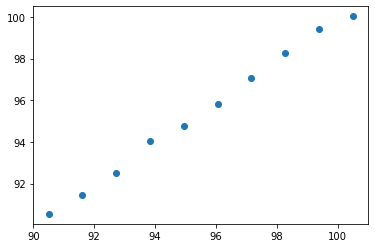

In [28]:
plt.plot(xi,yi,'o')

Coefficients (from curve_fit)
[1.6165495  0.98188376]
Covariance Matrix (from curve_fit)
[[ 3.00585083e+00 -3.14397582e-02]
 [-3.14397582e-02  3.29212037e-04]]

Final Result: y = (0.98 +/- 0.02) x + (1.62 +/- 1.73)


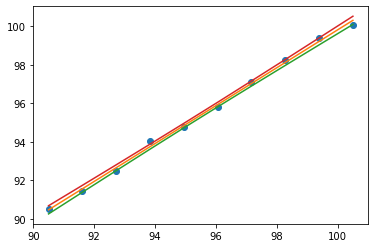

In [29]:
from scipy.optimize import curve_fit

def fitfunction(x,*paramlist):
    return paramlist[0]+paramlist[1]*x

init_vals = [0.0 for x in range(2)]
popt, pcov = curve_fit(fitfunction,xi,yi,p0=init_vals)
perr = np.sqrt(np.diag(pcov))

ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])

lower = np.percentile(ysample,2.5,axis=0)
upper = np.percentile(ysample,97.5,axis=0)
middle = (lower+upper)/2.0

print("Coefficients (from curve_fit)")
print (popt)
print("Covariance Matrix (from curve_fit)")
print (pcov)

print()
print ("Final Result: y = (%0.2f +/- %0.2f) x + (%0.2f +/- %0.2f)" % (popt[1],perr[1],popt[0],perr[0]))

plt.plot(xi,yi,'o')

plt.plot(xi,middle)
plt.plot(xi,lower)
plt.plot(xi,upper)
plt.show()

slope = []
dslope = []
yint = []
dyint = []
type = []

slope.append(popt[1])
dslope.append(perr[1])
yint.append(popt[0])
dyint.append(perr[0])
type.append('None')

<ErrorbarContainer object of 3 artists>

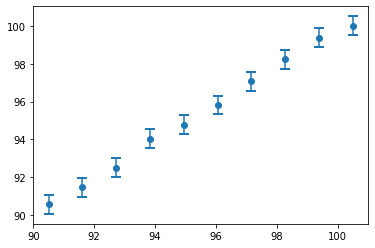

In [30]:
sigmai = np.array([0.5 for i in range(npts)])
plt.errorbar(xi, yi, yerr=sigmai, fmt='o', capsize=5, capthick=2)

Coefficients (from curve_fit)
[1.61654961 0.98188376]
Covariance Matrix (from curve_fit)
[[ 3.00584859e+00 -3.14397446e-02]
 [-3.14397446e-02  3.29211998e-04]]

Final Result: y = (0.98 +/- 0.02) x + (1.62 +/- 1.73)


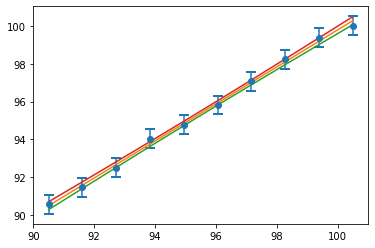

In [31]:
init_vals = [0.0 for x in range(2)]
popt, pcov = curve_fit(fitfunction,xi,yi,p0=init_vals,sigma=sigmai)
perr = np.sqrt(np.diag(pcov))

ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])

lower = np.percentile(ysample,2.5,axis=0)
upper = np.percentile(ysample,97.5,axis=0)
middle = (lower+upper)/2.0

print("Coefficients (from curve_fit)")
print (popt)
print("Covariance Matrix (from curve_fit)")
print (pcov)

print()
print ("Final Result: y = (%0.2f +/- %0.2f) x + (%0.2f +/- %0.2f)" % (popt[1],perr[1],popt[0],perr[0]))

plt.errorbar(xi, yi, yerr=sigmai, fmt='o', capsize=5, capthick=2)

plt.plot(xi,middle)
plt.plot(xi,lower)
plt.plot(xi,upper)
plt.show()

slope.append(popt[1])
dslope.append(perr[1])
yint.append(popt[0])
dyint.append(perr[0])
type.append('Uniform')

   The vlaues I used for x were 1.5, 10.5, 100.5. When xhigh = 1.5 and xlow = 0.5 there were serval points that were outside of the trend line and the uncertainty bars were very large. When xhigh = 100.5 and xlow = 0.5 the uncertainty bars were very small and all points were contained in the fit line. When xhigh = 100.5 amd xlow = 90.5 the fit line and uncertianties closely resembled 0.5-100.5 range but the ucertainty was a little larger. It appears that the larger the spread is and the further away from 0 the data becomes more accurate.

Question 2

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

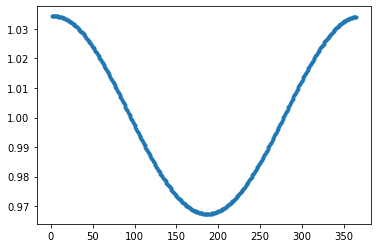

In [87]:
# Number of days in the sidereal year
daysPerYear = 365.256363

# Array to hold day of year

dayOfYear = np.array([i for i in range(1,366)])

# Earth-Sun Distance in A.U.
rES=1.0-0.01672*np.cos(2.0*np.pi/daysPerYear*(dayOfYear-4))
relPower=1/rES**2

plt.plot(dayOfYear,relPower,'.')

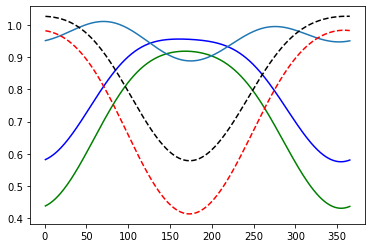

In [88]:
tiltAngle = -23.44*np.pi/180.0

angle = tiltAngle*np.cos(2.0*np.pi/daysPerYear*(dayOfYear+10))

angleNewYork = 40.7128*np.pi/180.0 - angle
angleRome = 41.9028*np.pi/180.0 - angle
angleMacapa = 0.0356*np.pi/180.0 - angle
angleWellington = -41.2769*np.pi/180.0 - angle
angleDurban = -29.8587*np.pi/180.0 - angle


plt.plot(dayOfYear,(np.cos(angleSanDiego)*relPower),'b')
plt.plot(dayOfYear,(np.cos(angleRome)*relPower),'g')
plt.plot(dayOfYear,(np.cos(angleMacapa)*relPower))
plt.plot(dayOfYear,(np.cos(angleWellington)*relPower),'r--')
plt.plot(dayOfYear,(np.cos(angleDurban)*relPower),'k--')

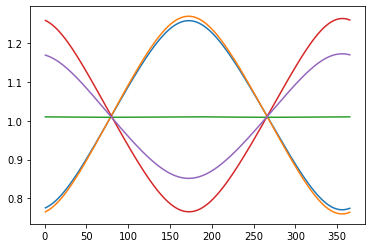

In [89]:
from Sun import Sun

coords = {'longitude': 74.0060, 'latitude': 40.7128}
sun = Sun()
sunrise = sun.getSunriseTime(coords)['decimal']
sunset = sun.getSunsetTime(coords)['decimal']
dayLength = sun.getSunsetTime(coords)['decimal']-sun.getSunriseTime(coords)['decimal']
for i in range(len(dayLength)):
    if dayLength[i]<0:
        dayLength[i] = dayLength[i]+24

lengthCorrectionNY = dayLength/12.0

coords = {'longitude': 12.4964, 'latitude': 41.9028}
sun = Sun()
sunrise = sun.getSunriseTime(coords)['decimal']
sunset = sun.getSunsetTime(coords)['decimal']
dayLength = sun.getSunsetTime(coords)['decimal']-sun.getSunriseTime(coords)['decimal']
for i in range(len(dayLength)):
    if dayLength[i]<0:
        dayLength[i] = dayLength[i]+24

lengthCorrectionR = dayLength/12.0

coords = {'longitude': 51.0705, 'latitude': 0.0356}
sun = Sun()
sunrise = sun.getSunriseTime(coords)['decimal']
sunset = sun.getSunsetTime(coords)['decimal']
dayLength = sun.getSunsetTime(coords)['decimal']-sun.getSunriseTime(coords)['decimal']
for i in range(len(dayLength)):
    if dayLength[i]<0:
        dayLength[i] = dayLength[i]+24

lengthCorrectionM = dayLength/12.0

coords = {'longitude': 174.7731, 'latitude': -41.2769}
sun = Sun()
sunrise = sun.getSunriseTime(coords)['decimal']
sunset = sun.getSunsetTime(coords)['decimal']
dayLength = sun.getSunsetTime(coords)['decimal']-sun.getSunriseTime(coords)['decimal']
for i in range(len(dayLength)):
    if dayLength[i]<0:
        dayLength[i] = dayLength[i]+24

lengthCorrectionW = dayLength/12.0

coords = {'longitude': 31.0218, 'latitude': -29.8587}
sun = Sun()
sunrise = sun.getSunriseTime(coords)['decimal']
sunset = sun.getSunsetTime(coords)['decimal']
dayLength = sun.getSunsetTime(coords)['decimal']-sun.getSunriseTime(coords)['decimal']
for i in range(len(dayLength)):
    if dayLength[i]<0:
        dayLength[i] = dayLength[i]+24

lengthCorrectionD = dayLength/12.0

plt.plot(dayOfYear,lengthCorrectionNY)
plt.plot(dayOfYear,lengthCorrectionR)
plt.plot(dayOfYear,lengthCorrectionM)
plt.plot(dayOfYear,lengthCorrectionW)
plt.plot(dayOfYear,lengthCorrectionD)

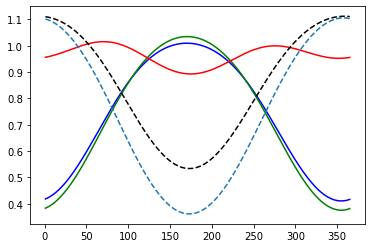

In [90]:
tempNYTheory = (np.cos(angleNewYork)*relPower*np.sqrt(lengthCorrectionSD))
tempRTheory = (np.cos(angleRome)*relPower*np.sqrt(lengthCorrectionR))
tempMTheory = (np.cos(angleMacapa)*relPower*np.sqrt(lengthCorrectionM))
tempWTheory = (np.cos(angleWellington)*relPower*np.sqrt(lengthCorrectionW))
tempDTheory = (np.cos(angleDurban)*relPower*np.sqrt(lengthCorrectionD))

plt.plot(dayOfYear,tempNYTheory,'b')
plt.plot(dayOfYear,tempRTheory,'g')
plt.plot(dayOfYear,tempMTheory,'r')
plt.plot(dayOfYear,tempWTheory,'--')
plt.plot(dayOfYear,tempDTheory,'k--')

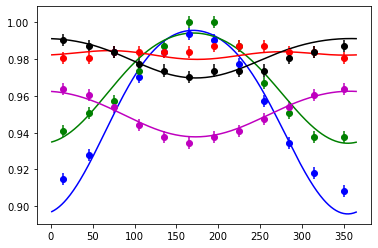

In [156]:
tempNY = np.array([4,6,10,27,23,27,30,29,25,19,12,7])+273.15
tempR = np.array([13,14,17,19,24,28,32,32,28,22,17,13])+273.15
tempM = np.array([26,26,26,27,27,27,27,28,28,28,27,27])+273.15
tempW = np.array([21,21,20,18,15,13,12,13,14,16,18,20])+273.15
tempD = np.array([28,29,28,27,25,24,23,24,24,24,26,27])+273.15

error = np.array([1 for i in range(12)])

mean = tempR.max()
tempNY=tempNY/mean
tempR=tempR/mean
tempM=tempM/mean
tempW = tempW/mean
tempD = tempD/mean
error=error/mean

month = np.array([(15+30*(i-2)) for i in range(1,13)])
for i in range(len(month)):
    if month[i]<0:
        month[i]=month[i]+365

plt.errorbar(month,tempNY,yerr=error,fmt='bo')
plt.errorbar(month,tempR,yerr=error,fmt='go')
plt.errorbar(month,tempM,yerr=error,fmt='ro')
plt.errorbar(month,tempW,yerr=error,fmt='mo')
plt.errorbar(month,tempD,yerr=error,fmt='ko')
plt.plot(dayOfYear,(tempNYTheory-1)/6+.994,'b')
plt.plot(dayOfYear,(tempRTheory-1)/11+.991,'g')
plt.plot(dayOfYear,(tempMTheory-1)/25.7+.984,'r')
plt.plot(dayOfYear,(tempWTheory-1)/30+.959,'m')
plt.plot(dayOfYear,(tempDTheory-1)/27+.987,'k')

the offsets and scale are as follows:
New York: 6 and 0.994
Rome, Italy: 11 and 0.991
Macapa, Brazil: 26 and 0.984
Wellington, New Zealond: 30 and 0.959
Durban, South Africa: 27 and 0.987

Question 3

In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [172]:
#  position of small mass (in cm)
xpos = np.array([1.045,2.044,3.012,4.012,5.061,6.011,7.044])
dxpos = np.array([0.003 for i in range(len(xpos))])

Periodup = 1.99644 +/- 0.00000821
Perioddown = 1.99350 +/- 0.00000855
Periodup = 1.99940 +/- 0.00000790
Perioddown = 1.99729 +/- 0.00000951
Periodup = 2.00225 +/- 0.00000704
Perioddown = 2.00111 +/- 0.00000879
Periodup = 2.00538 +/- 0.00000830
Perioddown = 2.00522 +/- 0.00000694
Periodup = 2.00853 +/- 0.00000815
Perioddown = 2.00923 +/- 0.00000776
Periodup = 2.01135 +/- 0.00000904
Perioddown = 2.01295 +/- 0.00000695
Periodup = 2.01496 +/- 0.00000739
Perioddown = 2.01722 +/- 0.00000901


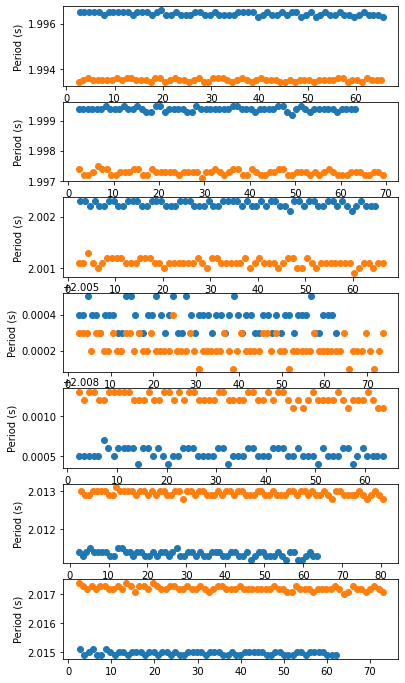

In [173]:
prefix = './kater_2_run'
suffix = '.txt'

tup = []
tdown = []
dtup = []
dtdown = []

# Generate the figure and the axes 
fig, axs = plt.subplots(nrows=7, ncols=1, figsize=(6,12)) 

for i in range(1,8):
    i2 = 2*i
    j = 2*i - 1
    fname1 = prefix + str(i2) + suffix
    fname2 = prefix + str(j) + suffix

    dfup = pd.read_csv(fname1,sep='\t')
    dfdown = pd.read_csv(fname2,sep='\t')
    
    timeup = np.array(dfup['Time'])
    periodup = []
    for k in range(2,len(timeup)):
        periodup.append(timeup[k]-timeup[k-2])
    
    periodup=np.array(periodup)

    semup = periodup.std()/np.sqrt(len(periodup))
    print ("Periodup = %0.5f +/- %0.8f" % (periodup.mean(),semup))
    
    tup.append(periodup.mean())
    dtup.append(semup)
    
    timedown = np.array(dfdown['Time'])
    perioddown = []
    for k in range(2,len(timedown)):
        perioddown.append(timedown[k]-timedown[k-2])
    
    perioddown=np.array(perioddown)

    semdown = perioddown.std()/np.sqrt(len(perioddown))
    print ("Perioddown = %0.5f +/- %0.8f" % (perioddown.mean(),semdown))
    
    tdown.append(perioddown.mean())
    dtdown.append(semup)

    axs[i-1].plot(timeup[2:],periodup,'o')
    axs[i-1].plot(timedown[2:],perioddown,'o')
    axs[i-1].set_ylabel('Period (s)')
      
tup = np.array(tup)
tdown = np.array(tdown)
dtup = np.array(dtup)
dtdown = np.array(dtdown)

plt.show()

In [174]:
up = pd.DataFrame({'Xpos':xpos, 'Period':tup, 'dXpos':dxpos, 'dPeriod':dtup})
down = pd.DataFrame({'Xpos':xpos, 'Period':tdown, 'dXpos':dxpos, 'dPeriod':dtdown})

Coefficients (from curve_fit)
[1.99350442e+00 2.80858978e-03 3.17652678e-05]
Covariance Matrix (from curve_fit)
[[ 3.44064474e-08 -1.80812150e-08  1.99607107e-09]
 [-1.80812150e-08  1.10498147e-08 -1.30715053e-09]
 [ 1.99607107e-09 -1.30715053e-09  1.61683442e-10]]
Coefficients (from curve_fit)
[1.98942806e+00 3.85342244e-03 1.23215841e-05]
Covariance Matrix (from curve_fit)
[[ 2.32017152e-08 -1.21925481e-08  1.34595622e-09]
 [-1.21925481e-08  7.45091723e-09 -8.81394001e-10]
 [ 1.34595622e-09 -8.81394001e-10  1.09018871e-10]]


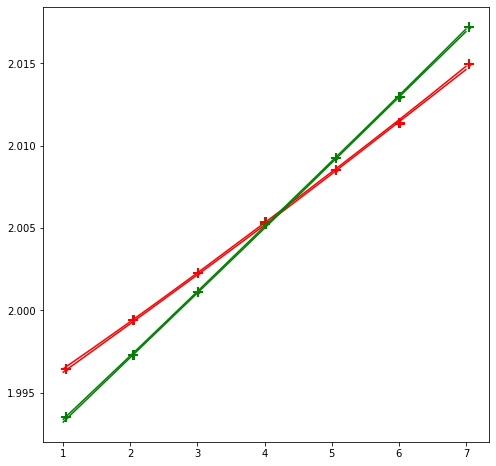

In [175]:
# Let's do linear fits using the curve_fit utility from scipy

from scipy.optimize import curve_fit

def fitfunction(x,*paramlist):
    return paramlist[0]+paramlist[1]*x + paramlist[2]*x*x

init_vals = [0.0 for x in range(3)]
x = np.array(up['Xpos'])
y = np.array(up['Period'])
poptu, pcovu = curve_fit(fitfunction,x,y,p0=init_vals)

#xi = np.linspace(np.min(x),np.max(x),100)
xi = np.linspace(1,7,1000)
ps = np.random.multivariate_normal(poptu,pcovu,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])
loweru = np.percentile(ysample,16.0,axis=0)
upperu = np.percentile(ysample,84.0,axis=0)
middleu = (loweru+upperu)/2.0

print("Coefficients (from curve_fit)")
print (poptu)
print("Covariance Matrix (from curve_fit)")
print (pcovu)

init_vals = [0.0 for x in range(3)]
x = np.array(down['Xpos'])
y = np.array(down['Period'])
poptd, pcovd = curve_fit(fitfunction,x,y,p0=init_vals)

#xi = np.linspace(np.min(x),np.max(x),100)
xi = np.linspace(1,7,1000)
ps = np.random.multivariate_normal(poptd,pcovd,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])
lowerd = np.percentile(ysample,16.0,axis=0)
upperd = np.percentile(ysample,84.0,axis=0)
middled = (lowerd+upperd)/2.0

print("Coefficients (from curve_fit)")
print (poptd)
print("Covariance Matrix (from curve_fit)")
print (pcovd)

fig2, axs2 = plt.subplots(nrows=1, ncols=1, figsize=(8,8)) 

axs2.errorbar(up.Xpos,up.Period,yerr=up.dPeriod,xerr=up.dXpos,fmt='r.',capsize=5, capthick=2)
axs2.errorbar(down.Xpos,down.Period,yerr=down.dPeriod,xerr=down.dXpos,fmt='g.',capsize=5, capthick=2)

#axs2.plot(xi,middleu)
axs2.plot(xi,loweru,'r')
axs2.plot(xi,upperu,'r')

#axs2.plot(xi,middle)
axs2.plot(xi,lowerd,'g')
axs2.plot(xi,upperd,'g')

#axs2.set_xlim(3.8,4.3)
#axs2.set_ylim(2.003,2.006)

plt.show()

In [176]:
tmin = []
for i in range(len(xi)):
    if loweru[i] < upperd[i]:
        tmin.append(loweru[i])
tmin = np.array(tmin)
tmin = tmin.min()

tmax = []
for i in range(len(xi)):
    if upperu[i] > lowerd[i]:
        tmax.append(upperu[i])
tmax = np.array(tmax)
tmax = tmax.max()

tbar = (tmax+tmin)/2.0
dtbar = (tmax-tmin)/2.0

print ("Period = %0.5f +/- %0.5f" % (tbar,dtbar))

Period = 2.00597 +/- 0.00048


In [178]:
length = 0.9986
dlength = 0.00005

g = 4*np.pi**2*length/tbar**2
dg = g*np.sqrt((dlength/length)**2+(2*dtbar/tbar)**2)

print ("g = %0.4f +/- %0.4f" % (g,dg))

g = 9.7973 +/- 0.0047


In [181]:
M=1.35928
m=0.72705
Mbar=2.90
D=0.9986 
L=1.523 

#g = 9.799 # value of g in Newport News
g = 9.8144


RM = 0.04753
Rm = 0.03498
offsetM = 0.0135
offsetm = 0.0104
l1=D/2.0+RM+offsetM

# Find the value of x that satisfies the equation above

diff = 1.0E+99
olddiff = 1.0E+99
l2 = []
xpos = []
t1 = []
t2 = []
for i in range(1000):
    l2.append(D/2.0+Rm+(i/1000.0)*.12)
    xpos.append((l2[i]-offsetm-D/2-Rm-0.0000)*100) # distance from the small mass to the knife-edge, in cm.
    x=(M*l1-m*l2[i])/(M+m+Mbar)
    h2=D/2.0+x
    h1=D/2.0-x
    lhs=h1*h2;
    Icm=1.0/12.0*Mbar*L*L+Mbar*x*x+M*(l1-x)*(l1-x)+m*(l2[i]+x)*(l2[i]+x)+1/2.0*m*Rm**2 + 1.0/2*M*RM**2
    rhs=Icm/(M+m+Mbar)
    diff = lhs-rhs
    if (np.abs(diff)<olddiff):
        olddiff=diff
        index=i
    t1.append(2*np.pi*np.sqrt((h1*h1+rhs)/(g*h1)))
    t2.append(2*np.pi*np.sqrt((h2*h2+rhs)/(g*h2)))
    
#print (l2,t1,t2)

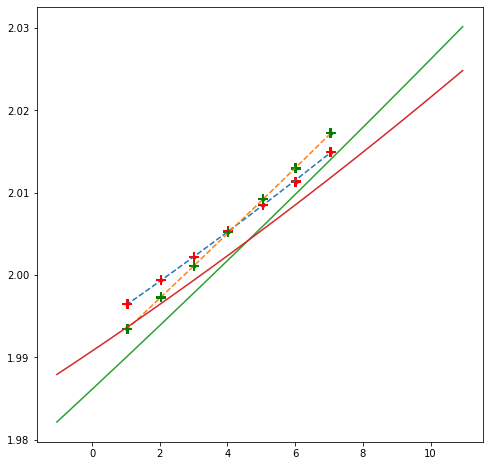

In [182]:
fig2, axs2 = plt.subplots(nrows=1, ncols=1, figsize=(8,8)) 

axs2.errorbar(up.Xpos,up.Period,yerr=up.dPeriod,xerr=up.dXpos,fmt='r.',capsize=5, capthick=2)
axs2.errorbar(down.Xpos,down.Period,yerr=down.dPeriod,xerr=down.dXpos,fmt='g.',capsize=5, capthick=2)

axs2.plot(xi,middleu,'--')


axs2.plot(xi,middled,'--')


axs2.plot(xpos,t1,label='Small Mass Down')
axs2.plot(xpos,t2,label='Small Mass Up')

plt.show()

Coefficients (from curve_fit)
[10.12438163]
Covariance Matrix (from curve_fit)
[[5.04281129e-05]]
Coefficients (from curve_fit)
[10.04384605]
Covariance Matrix (from curve_fit)
[[5.19216419e-05]]


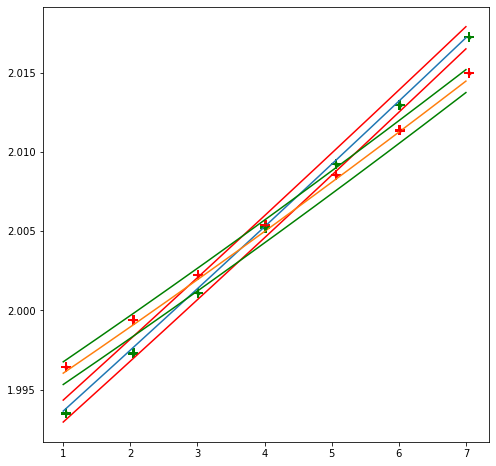

In [200]:
def theoryfitfunction1(xdata,*paramlist):
    
    M=1.35928 # large mass
    m=0.72705 # small mass
    Mbar=2.90 # mass of bar (with small and large masses removed)
    D=0.9986 # distance between knife-edge pivot points
    L=1.523  # length of bar
    
    g = paramlist[0]
    #fudge_factor = paramlist[1]
    fudge_factor=0.0000

    RM = 0.04753
    Rm = 0.03498
    offsetM = 0.0500
    offsetm = 0.0300
    l1=D/2.0+RM+offsetM
    
    l2 = D/2.0+Rm+offsetm+xdata/100.0+fudge_factor
    x=(M*l1-m*l2)/(M+m+Mbar)
    
    h2=D/2.0+x
    h1=D/2.0-x
    Icm=1.0/12.0*Mbar*L*L+Mbar*x*x+M*(l1-x)*(l1-x)+m*(l2+x)*(l2+x)+1/2.0*m*Rm**2 + 1.0/2*M*RM**2
    rhs=Icm/(M+m+Mbar)
    
    t1 = 2*np.pi*np.sqrt((h1*h1+rhs)/(g*h1))
    t2 = 2*np.pi*np.sqrt((h2*h2+rhs)/(g*h2))
    
    return t1

def theoryfitfunction2(xdata,*paramlist):
    
    M=1.35928 # large mass
    m=0.72705 # small mass
    Mbar=2.90 # mass of bar (with small and large masses removed)
    D=0.9986 # distance between knife-edge pivot points
    L=1.523  # length of bar
    
    g = paramlist[0]
    #fudge_factor = paramlist[1]
    fudge_factor=0.0000


    RM = 0.04753
    Rm = 0.03498
    offsetM = 0.0500
    offsetm = 0.0300
    l1=D/2.0+RM+offsetM
    
    l2 = D/2.0+Rm+offsetm+xdata/100.0+fudge_factor
    x=(M*l1-m*l2)/(M+m+Mbar)
    
    h2=D/2.0+x
    h1=D/2.0-x
    Icm=1.0/12.0*Mbar*L*L+Mbar*x*x+M*(l1-x)*(l1-x)+m*(l2+x)*(l2+x)+1/2.0*m*Rm**2 + 1.0/2*M*RM**2
    rhs=Icm/(M+m+Mbar)
    
    t1 = 2*np.pi*np.sqrt((h1*h1+rhs)/(g*h1))
    t2 = 2*np.pi*np.sqrt((h2*h2+rhs)/(g*h2))
    
    return t2

init_vals = [9.814]
x = np.array(up['Xpos'])
y = np.array(up['Period'])
poptu, pcovu = curve_fit(theoryfitfunction1,x,y,p0=init_vals)


xi = np.linspace(1,7,1000)
ps = np.random.multivariate_normal(poptu,pcovu,10000)
ysample=np.asarray([theoryfitfunction1(xi,*pi) for pi in ps])
loweru = np.percentile(ysample,16.0,axis=0)
upperu = np.percentile(ysample,84.0,axis=0)
middleu = (loweru+upperu)/2.0

print("Coefficients (from curve_fit)")
print (poptu)
print("Covariance Matrix (from curve_fit)")
print (pcovu)

init_vals = [9.814]
x = np.array(down['Xpos'])
y = np.array(down['Period'])
poptd, pcovd = curve_fit(theoryfitfunction2,x,y,p0=init_vals)


xi = np.linspace(1,7,1000)
ps = np.random.multivariate_normal(poptd,pcovd,10000)
ysample=np.asarray([theoryfitfunction2(xi,*pi) for pi in ps])
lowerd = np.percentile(ysample,16.0,axis=0)
upperd = np.percentile(ysample,84.0,axis=0)
middled = (lowerd+upperd)/2.0

print("Coefficients (from curve_fit)")
print (poptd)
print("Covariance Matrix (from curve_fit)")
print (pcovd)

fig2, axs2 = plt.subplots(nrows=1, ncols=1, figsize=(8,8)) 

axs2.errorbar(up.Xpos,up.Period,yerr=up.dPeriod,xerr=up.dXpos,fmt='r.',capsize=5, capthick=2)
axs2.errorbar(down.Xpos,down.Period,yerr=down.dPeriod,xerr=down.dXpos,fmt='g.',capsize=5, capthick=2)

axs2.plot(xi,middleu)
axs2.plot(xi,loweru,'r')
axs2.plot(xi,upperu,'r')

axs2.plot(xi,middled)
axs2.plot(xi,lowerd,'g')
axs2.plot(xi,upperd,'g')



plt.show()

In [184]:
tmin = []
for i in range(len(xi)):
    if loweru[i] < upperd[i]:
        tmin.append(loweru[i])
tmin = np.array(tmin)
tmin = tmin.min()

tmax = []
for i in range(len(xi)):
    if upperu[i] > lowerd[i]:
        tmax.append(upperu[i])
tmax = np.array(tmax)
tmax = tmax.max()

tbar = (tmax+tmin)/2.0
dtbar = (tmax-tmin)/2.0

print ("Period = %0.5f +/- %0.5f" % (tbar,dtbar))

Period = 2.00543 +/- 0.01268


In [185]:
length = 0.9986
dlength = 0.00005

g = 4*np.pi**2*length/tbar**2
dg = g*np.sqrt((dlength/length)**2+(2*dtbar/tbar)**2)

print ("g = %0.4f +/- %0.4f" % (g,dg))

g = 9.8025 +/- 0.1240


The 'best' value for g I got was 9.8025 +/- 0.1240. The best offset that I found was more than double the original value. While the offest seems reasonable in to set but it seems less reasonable that the offset would be much larger than the original.